In [209]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import preprocessing
import numpy as np

In [210]:
df = pd.read_csv('nba_logreg.csv').sample(200, random_state=12)[['FGM', 'DREB', 'TARGET_5Yrs', 'Name']].reset_index(drop=True)
df.columns = ['field_goals_made', 'defensive_rebounds', 'lasted_5_years_in_nba', 'player_name']

df['lasted_5_years_in_nba'] = df['lasted_5_years_in_nba'].apply(lambda x: 'n' if x==0 else 'y')
df.head()

,field_goals_made,defensive_rebounds,lasted_5_years_in_nba,player_name
0,1.0,1.2,n,Mike Harper
1,1.7,1.0,n,Cory Carr
2,3.3,1.5,n,Chris Copeland
3,2.4,1.8,y,Jeff Turner
4,2.0,1.6,n,Jerian Grant


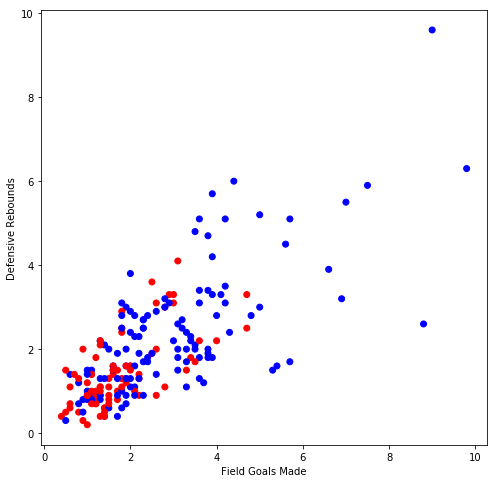

In [211]:
# plot it
plt.figure(figsize=[8,8])
plt.xlabel('Field Goals Made')
plt.ylabel('Defensive Rebounds')
plt.scatter(x=df['field_goals_made'], y=df['defensive_rebounds'], 
            c=df['lasted_5_years_in_nba'].apply(lambda x: 'red' if x=='n' else 'blue'))

In [212]:
def euclidean(x1, x2, y1, y2):
    return np.sqrt((x2-x1)**2 + (y2-y1)**2)

df['distance'] = df.apply(lambda r: euclidean(x1=4, x2=r['field_goals_made'], y1=4, y2=r['defensive_rebounds']), axis=1)
df_sorted = df.sort_values(by='distance')
df_sorted

,field_goals_made,defensive_rebounds,lasted_5_years_in_nba,player_name,distance
85,3.9,4.2,y,Kevin Willis,0.223607
44,4.2,3.5,y,Jason Kidd,0.538516
26,3.8,3.4,y,Doug Smith,0.632456
71,4.1,3.3,y,Rudy Gay,0.707107
160,3.9,3.3,y,Marcus Fizer,0.707107
125,3.6,3.4,y,Chris Mills,0.721110
27,3.8,4.7,y,Taj Gibson,0.728011
164,3.1,4.1,n,Keith Lee,0.905539
55,4.2,3.1,y,Cedric Henderson,0.921954
127,3.5,4.8,y,Andre Drummond,0.943398


In [213]:
# save!!
df_sorted.to_csv('../nba_sorted_with_distances.csv', index=False)